In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from build_model import interaction_model, get_subnetwork
from utils import get_interaction_model
from interactions import return_interaction_function

In [4]:
from path_explain import utils, PathExplainerTF, scatter_plot, summary_plot
utils.set_up_environment(visible_devices='5')

In [87]:
x = np.random.randn(2000, 5).astype(np.float32)
y = 2 * x[:, 0] * x[:, 1] - \
    x[:, 0] * x[:, 2] + \
    1.5 * x[:, 2] * x[:, 3] + \
    0.5 * x[:, 1] * x[:, 3] + \
    x[:, 4]

In [89]:
model = get_interaction_model(x, y)

Train on 1600 samples
Epoch 1/50
1600/1600 [==============================] - 0s 221us/sample - loss: 5.2016 - mean_squared_error: 5.2016
Epoch 2/50
1600/1600 [==============================] - 0s 12us/sample - loss: 2.7179 - mean_squared_error: 2.7179
Epoch 3/50
1600/1600 [==============================] - 0s 12us/sample - loss: 1.8460 - mean_squared_error: 1.8460
Epoch 4/50
1600/1600 [==============================] - 0s 13us/sample - loss: 1.2044 - mean_squared_error: 1.2044
Epoch 5/50
1600/1600 [==============================] - 0s 12us/sample - loss: 0.8077 - mean_squared_error: 0.8077
Epoch 6/50
1600/1600 [==============================] - 0s 13us/sample - loss: 0.6286 - mean_squared_error: 0.6286
Epoch 7/50
1600/1600 [==============================] - 0s 14us/sample - loss: 0.4417 - mean_squared_error: 0.4417
Epoch 8/50
1600/1600 [==============================] - 0s 13us/sample - loss: 0.3759 - mean_squared_error: 0.3759
Epoch 9/50
1600/1600 [==============================] - 0

In [93]:
predicted_y = model.predict(x)

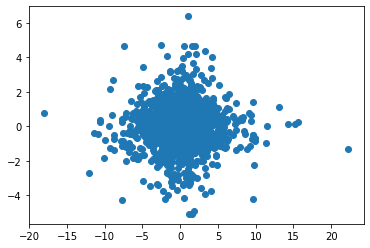

In [92]:
plt.scatter(y, predicted_y)

In [90]:
interpret_model = tf.keras.models.clone_model(model)
interpret_model.set_weights(model.get_weights())
for layer in interpret_model.layers:
    if layer.get_config().get('activation', None) == 'relu':
        layer.activation = utils.softplus_activation(beta=10.0)

In [91]:
explainer = PathExplainerTF(interpret_model)

baseline = np.zeros((1, x.shape[1])).astype(np.float32)
interactions = explainer.interactions(inputs=x[:200],
                                      baseline=baseline,
                                      batch_size=100,
                                      num_samples=100,
                                      use_expectation=False,
                                      output_indices=0,
                                      verbose=True,
                                      interaction_index=None)

100%|██████████| 200/200 [02:10<00:00,  1.53it/s]


In [94]:
attributions = np.sum(interactions, axis=-1)

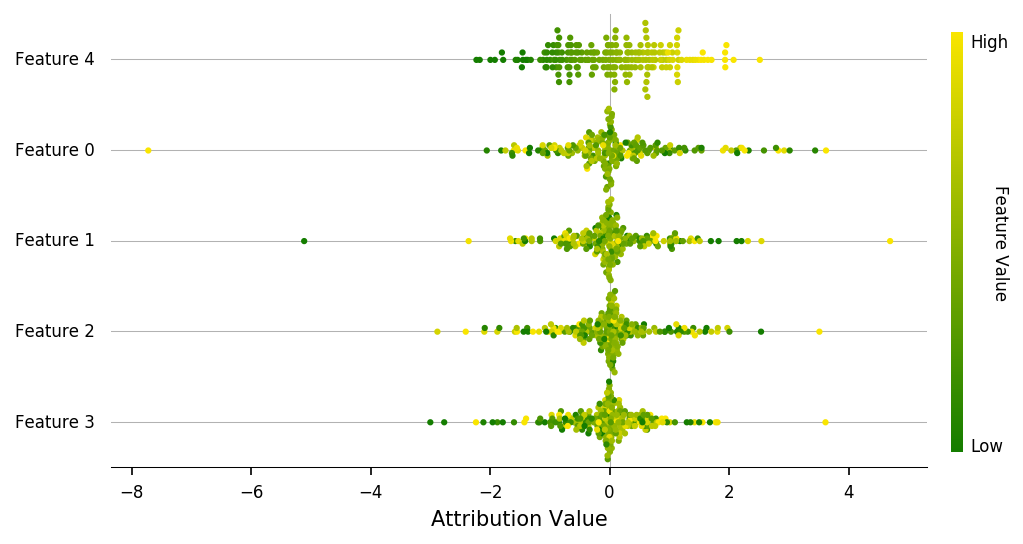

In [95]:
summary_plot(attributions,
             x[:200])

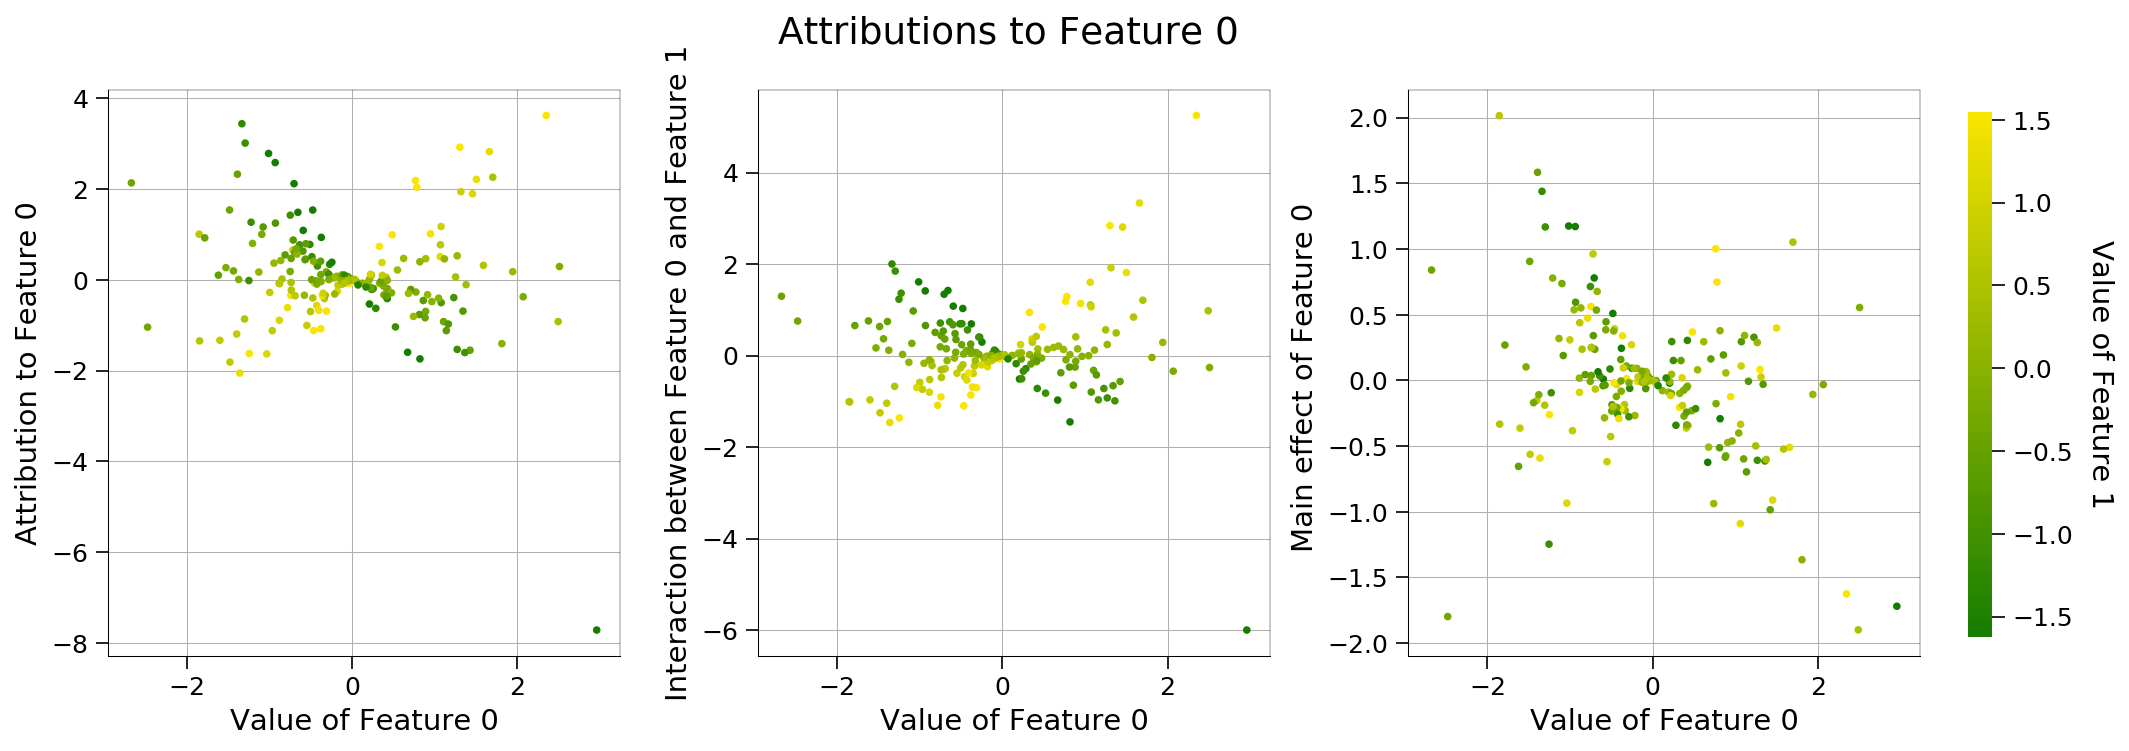

In [98]:
fig, axs = scatter_plot(attributions,
                        x[:200],
                        feature_index=0,
                        interactions=interactions,
                        color_by=4,
                        feature_names=None,
                        scale_y_ind=True)

In [86]:
np.mean(np.abs(interactions), axis=0)

array([[0.17454072, 0.17087816, 0.00648498, 0.02050547, 0.00806674],
       [0.17087816, 0.1745632 , 0.00587985, 0.0237739 , 0.00786588],
       [0.00648498, 0.00587985, 0.00956019, 0.00309727, 0.00176144],
       [0.02050547, 0.0237739 , 0.00309727, 0.35621677, 0.00548609],
       [0.00806674, 0.00786588, 0.00176144, 0.00548609, 0.01260004]])